<a href="https://colab.research.google.com/github/Alexgit999/Intro_IA_UE/blob/main/Actividad_3_1_modelo_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de bibliotecas

In [1]:
# Importamos librerías
from google.colab import drive
from sklearn.preprocessing import LabelEncoder # Transformar categoricas a numericas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# Carga del dataset iris_extended

Columns
Basic Attributes
* Species: Species of the iris flower (Setosa, Versicolor, Virginica)

Environmental Factors
* Elevation: Elevation level where the iris was found (in meters)
* Soil Type: Type of soil where the iris was found (Loamy, Sandy, Clayey)

Basic Morphological Features
* Sepal Length (cm): Length of the sepal in centimeters
* Sepal Width (cm): Width of the sepal in centimeters
* Petal Length (cm): Length of the petal in centimeters
* Petal Width (cm): Width of the petal in centimeters

Derived Morphological Features
* Sepal Area (cm^2): Area of the sepal calculated as Sepal Length × Sepal Width
* Petal Area (cm^2): Area of the petal calculated as Petal Length × Petal Width
* Sepal Aspect Ratio: Ratio of Sepal Length to Sepal Width
* Petal Aspect Ratio: Ratio of Petal Length to Petal Width
* Sepal-to-Petal Length Ratio: Ratio of Sepal Length to Petal Length
* Sepal-to-Petal Width Ratio: Ratio of Sepal Width to Petal Width
* Sepal-Petal Length Difference: Difference between Sepal Length and Petal Length
* Sepal-Petal Width Difference: Difference between Sepal Width and Petal Width

Advanced Morphological Features
* Petal Curvature (mm): Measure of petal curvature in millimeters
* Petal Texture (trichomes/mm^2): Number of trichomes per square millimeter on the petal
* Leaf Area (cm^2): Area of a typical leaf of the iris plant in square centimeters

Additional Derived Features
* Sepal Area Sqrt: Square root of the Sepal Area
* Petal Area Sqrt: Square root of the Petal Area
* Area Ratios: Custom attribute that captures various area ratios in the dataset

In [2]:
# Montamos y cargamos el fichero con los datos
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Notebooks/intro_ia/Dataset_iris_extended.csv'

df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Descripción del Dataset

In [3]:
df.head()

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   species                          1200 non-null   object 
 1   elevation                        1200 non-null   float64
 2   soil_type                        1200 non-null   object 
 3   sepal_length                     1200 non-null   float64
 4   sepal_width                      1200 non-null   float64
 5   petal_length                     1200 non-null   float64
 6   petal_width                      1200 non-null   float64
 7   sepal_area                       1200 non-null   float64
 8   petal_area                       1200 non-null   float64
 9   sepal_aspect_ratio               1200 non-null   float64
 10  petal_aspect_ratio               1200 non-null   float64
 11  sepal_to_petal_length_ratio      1200 non-null   float64
 12  sepal_to_petal_width

In [5]:
print('ESPECIES DISTINTAS:', df['species'].nunique())
print('SUELOS DISTINTOS:', df['soil_type'].nunique())

ESPECIES DISTINTAS: 3
SUELOS DISTINTOS: 3


# Preparación de datos

In [6]:
# En algún punto más adelante podría ser necesario normalizar, pero podría ser relevante hacerlo aquí en futuros ejercicios
"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['altura', 'peso']] = scaler.fit_transform(df[['altura', 'peso']])
"""

df.drop_duplicates(inplace=True) # En éste caso no hay duplicados

## Transformación de variables categóricas en variables numéricas

In [7]:
# Vamos a transformar "species" y "soil_type" a int para poder trabajar con ellas mejor en adelante

ndf = df # NewDataFrame a parte para no alterar más el df original

# Mantengo la variable con 3 categorías, pero en numérico "0", "1" y "2"
_especies = LabelEncoder()
ndf['especies'] = _especies.fit_transform(ndf['species'])

# Transformo los 3 tipos de suelo en 3 variables booleanas diferentes
ndf = pd.get_dummies(df, columns=['soil_type'], drop_first=False)

In [8]:
ndf.head()

,species,elevation,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,petal_aspect_ratio,...,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios,especies,soil_type_clay,soil_type_loamy,soil_type_sandy
0,setosa,161.8,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,6.307692,...,5.33,18.33,53.21,4.194711,0.652993,41.265478,0,False,False,True
1,setosa,291.4,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,4.135135,...,5.90,20.45,52.53,4.711051,0.752396,39.205087,0,True,False,False
2,setosa,144.3,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,3.868421,...,5.66,24.62,50.25,3.778889,0.747395,25.563910,0,False,False,True
3,setosa,114.6,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,9.000000,...,4.51,22.91,50.85,3.995197,0.510000,61.367166,0,True,False,False
4,setosa,110.9,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,4.730769,...,4.03,21.56,40.57,3.730885,0.565509,43.525641,0,False,True,False


In [9]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   species                          1200 non-null   object 
 1   elevation                        1200 non-null   float64
 2   sepal_length                     1200 non-null   float64
 3   sepal_width                      1200 non-null   float64
 4   petal_length                     1200 non-null   float64
 5   petal_width                      1200 non-null   float64
 6   sepal_area                       1200 non-null   float64
 7   petal_area                       1200 non-null   float64
 8   sepal_aspect_ratio               1200 non-null   float64
 9   petal_aspect_ratio               1200 non-null   float64
 10  sepal_to_petal_length_ratio      1200 non-null   float64
 11  sepal_to_petal_width_ratio       1200 non-null   float64
 12  sepal_petal_length_d

## Separación de características y etiquetas (X, Y)

In [10]:
# Variable objetivo: especies

ndf = ndf.drop(['species'], axis=1, errors='ignore') # Quito species para agilizar

x = ndf.drop('especies', axis=1)
y = ndf['especies']

print('EJE X:', x.columns.tolist())
print('EJE Y (especies):', y.unique())

EJE X: ['elevation', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_area', 'petal_area', 'sepal_aspect_ratio', 'petal_aspect_ratio', 'sepal_to_petal_length_ratio', 'sepal_to_petal_width_ratio', 'sepal_petal_length_diff', 'sepal_petal_width_diff', 'petal_curvature_mm', 'petal_texture_trichomes_per_mm2', 'leaf_area_cm2', 'sepal_area_sqrt', 'petal_area_sqrt', 'area_ratios', 'soil_type_clay', 'soil_type_loamy', 'soil_type_sandy']
EJE Y (especies): [0 1 2]


## Detección de Anomalías.

In [11]:
# Usaré Z-score para eliminar outliers
# Z-score supone normalidad, haré una pequeña prueba de normalidad (SHAPIRO-WILK) para cada especie

import scipy.stats as stats

normalidad = {} # diccionario para almacenar las variables normales

for especie in ndf['especies'].unique():
  group = ndf[ndf['especies'] == especie]
  print(f'\nESPECIE:{especie}')

  for col in group.select_dtypes(include='number').columns:
    # Prueba de Shapiro-Wilk
    shapiro_stat, shapiro_p = stats.shapiro(group[col].dropna())
    #shapiro_test = stats.shapiro(group[col]) # Otra forma

    print(f'{col}: p={shapiro_p:.4f} => {"Normal" if (shapiro_p > 0.05) else "No normal"}')

    # Guardar resultados
    normalidad[f"{especie}_{col}"] = {
        "Shapiro-Wilk p-valor": round(shapiro_p, 4),

        "Normalidad (p > 0.05)": shapiro_p > 0.05
    }


ESPECIE:0
elevation: p=0.0000 => No normal
sepal_length: p=0.6395 => Normal
sepal_width: p=0.0401 => No normal
petal_length: p=0.5881 => Normal
petal_width: p=0.0802 => Normal
sepal_area: p=0.5347 => Normal
petal_area: p=0.0042 => No normal
sepal_aspect_ratio: p=0.0000 => No normal
petal_aspect_ratio: p=0.0000 => No normal
sepal_to_petal_length_ratio: p=0.0000 => No normal
sepal_to_petal_width_ratio: p=0.0000 => No normal
sepal_petal_length_diff: p=0.5990 => Normal
sepal_petal_width_diff: p=0.1134 => Normal
petal_curvature_mm: p=0.1147 => Normal
petal_texture_trichomes_per_mm2: p=0.1190 => Normal
leaf_area_cm2: p=0.5800 => Normal
sepal_area_sqrt: p=0.3447 => Normal
petal_area_sqrt: p=0.5249 => Normal
area_ratios: p=0.0000 => No normal
especies: p=1.0000 => Normal

ESPECIE:1
elevation: p=0.0000 => No normal
sepal_length: p=0.3941 => Normal
sepal_width: p=0.6390 => Normal
petal_length: p=0.5186 => Normal
petal_width: p=0.2988 => Normal
sepal_area: p=0.0214 => No normal
petal_area: p=0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


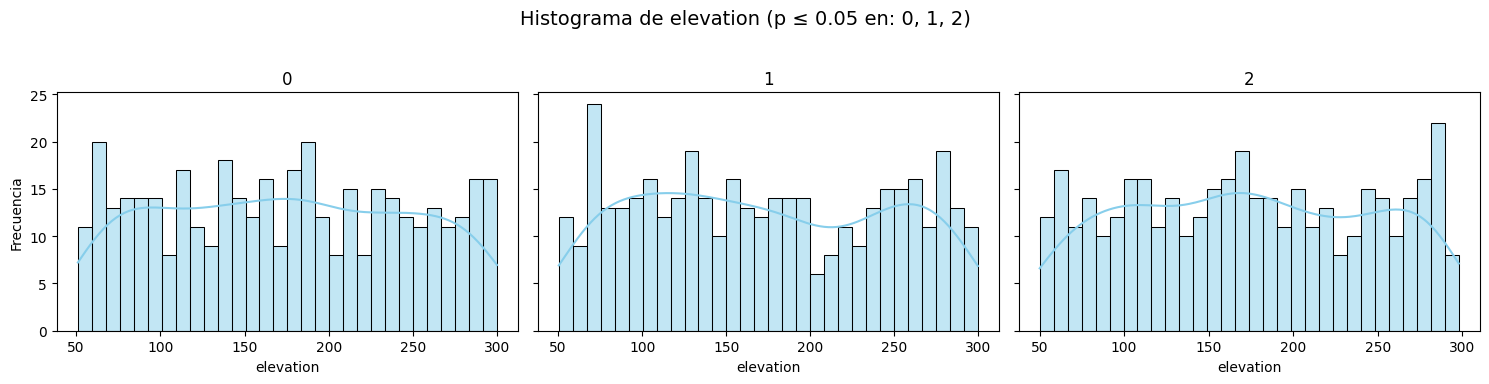

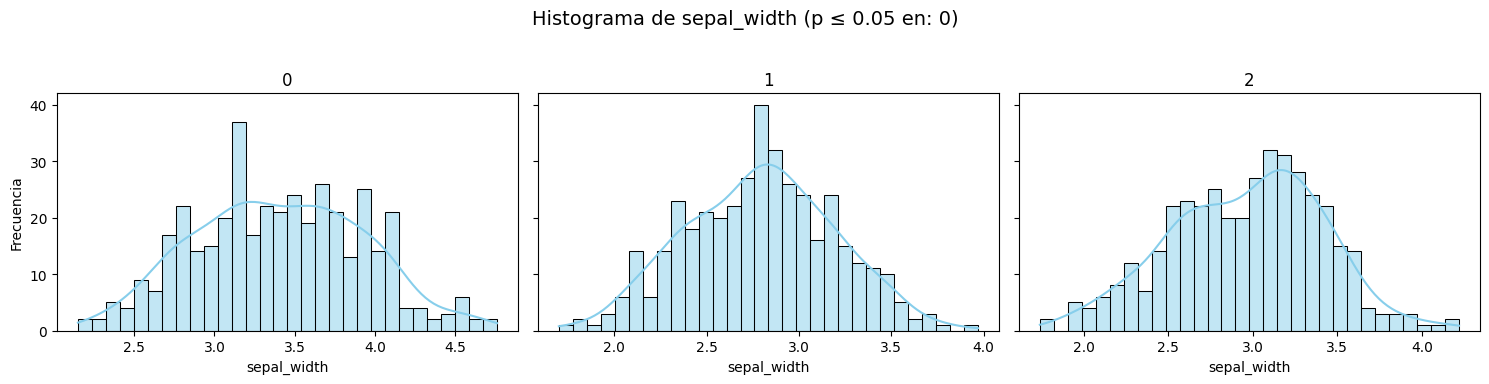

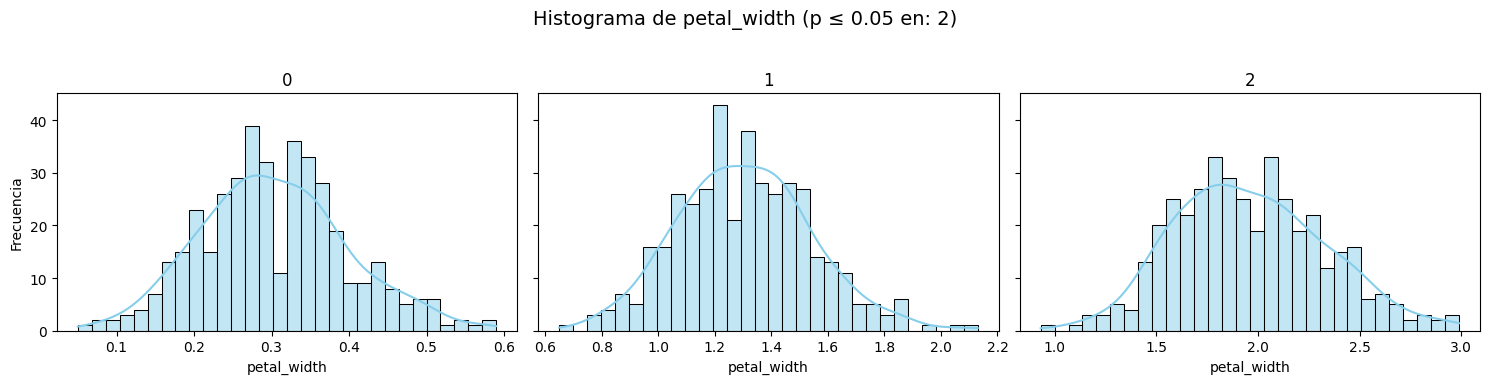

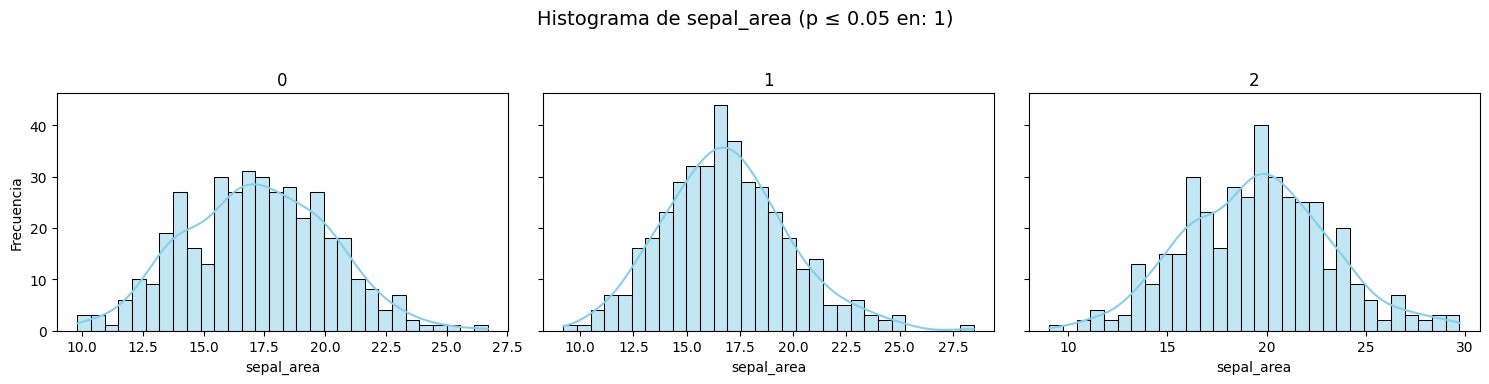

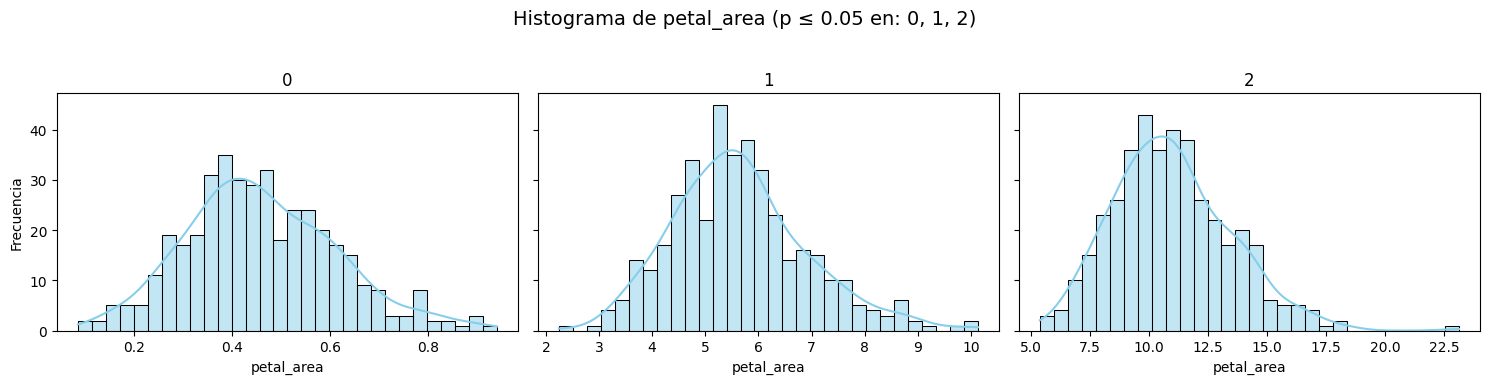

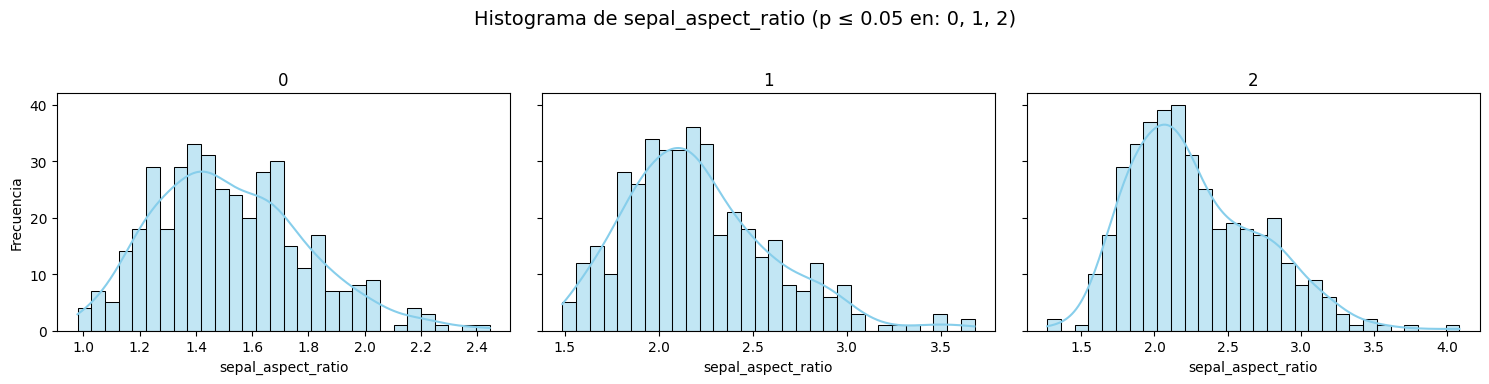

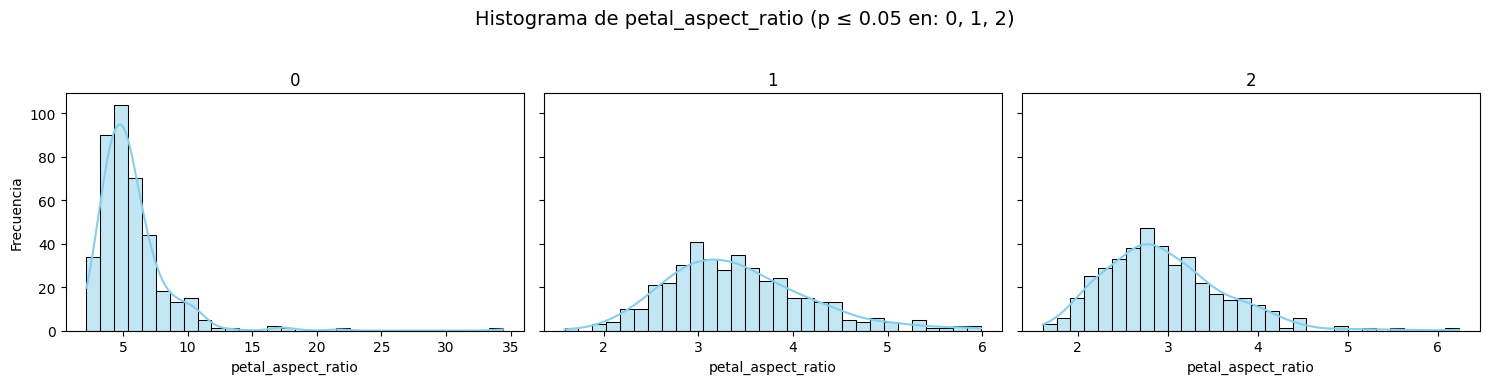

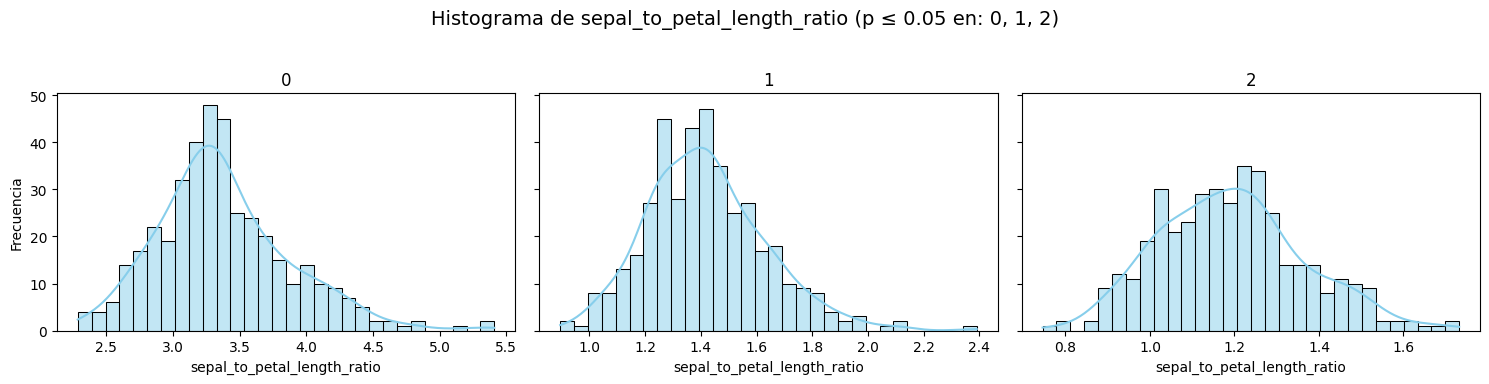

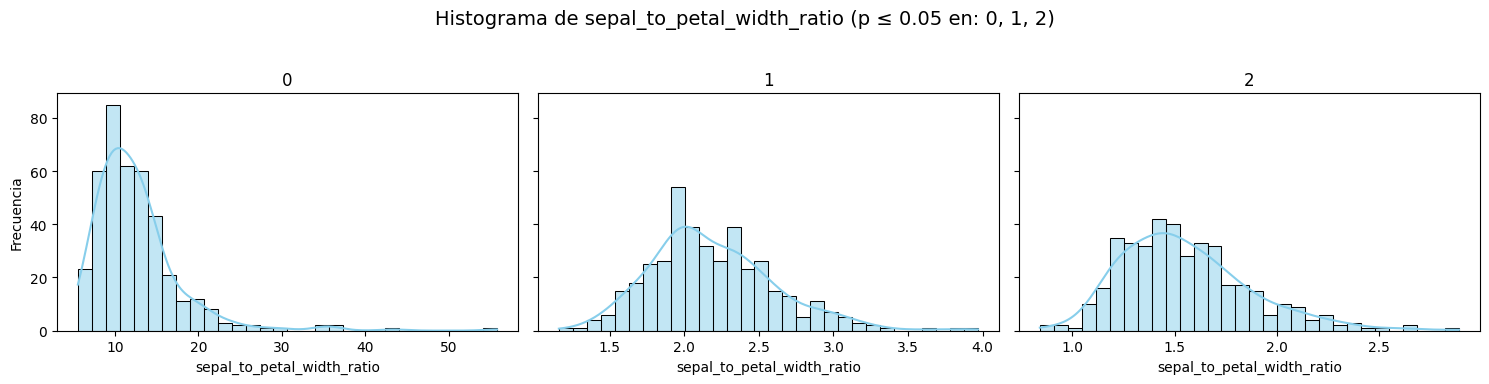

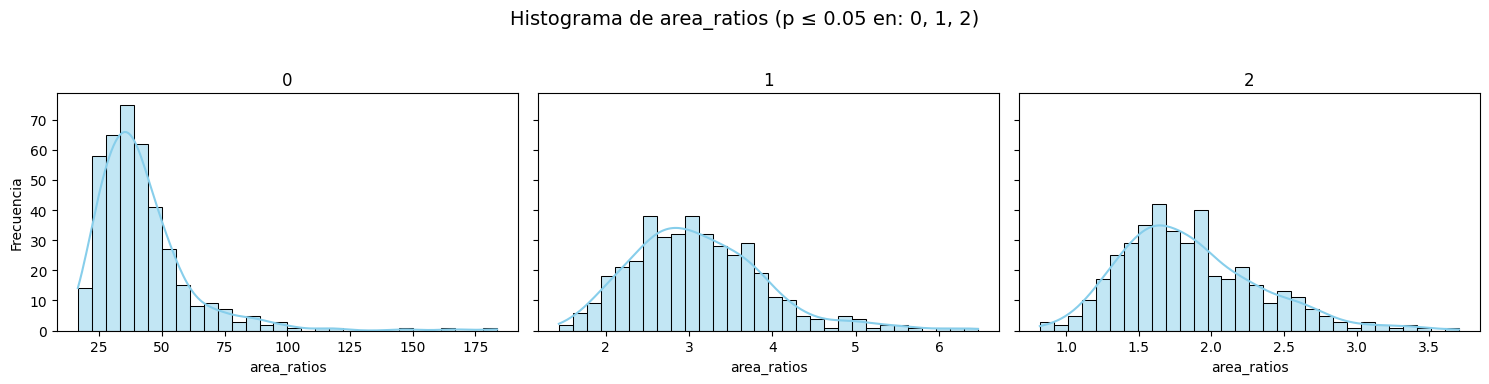

In [12]:
# El código no es mío
# Examinamos visualmente las variables que no han pasado el test anterior

import matplotlib.pyplot as plt
import seaborn as sns

especies = ndf['especies'].unique()
variables = ndf.select_dtypes(include='number').columns

for col in variables:
    # Buscar especies donde la variable no es normal según el diccionario
    no_normales = [esp for esp in especies if not normalidad.get(f"{esp}_{col}", {}).get("Normalidad (p > 0.05)", True)]

    if no_normales:
        fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
        fig.suptitle(f'Histograma de {col} (p ≤ 0.05 en: {", ".join(map(str, no_normales))})', fontsize=14)

        for i, especie in enumerate(especies):
            grupo = ndf[ndf['especies'] == especie]
            sns.histplot(grupo[col], kde=True, bins=30, ax=axes[i], color='skyblue')
            axes[i].set_title(f'{especie}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

🔴 Podemos concluir que, según la prueba de Shapiro-Wilk y un examen visual, las variables de ratios no siguen normalidad, y puesto que Z-score supone normalidad, no voy a eliminar los outliers que me de Z-score sobre estas variables

In [13]:
from scipy.stats import zscore

excluir = ['sepal_aspect_ratio', 'petal_aspect_ratio', 'sepal_to_petal_length_ratio', 'sepal_to_petal_width_ratio', 'area_ratios']

vars_zscore = ndf.select_dtypes(include='number').drop(columns=excluir).columns

# Aplicamos Z-score
gruposz = ndf.groupby('especies')[vars_zscore].transform(zscore)

outliers = (gruposz.abs() > 3)

print(outliers.sum())

# Filas con al menos un True (es decir, algún outlier en alguna columna)
_outliers = outliers.any(axis=1)
# Nuevo dataframe limpio
nndf = ndf[~_outliers].copy() # NewNewDataFrame

elevation                          0
sepal_length                       3
sepal_width                        0
petal_length                       2
petal_width                        3
sepal_area                         2
petal_area                         5
sepal_petal_length_diff            2
sepal_petal_width_diff             3
petal_curvature_mm                 4
petal_texture_trichomes_per_mm2    6
leaf_area_cm2                      2
sepal_area_sqrt                    2
petal_area_sqrt                    5
especies                           0
dtype: int64


/usr/local/lib/python3.11/dist-packages/pandas/core/groupby/generic.py:1828: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  lambda x: func(x, *args, **kwargs), axis=self.axis
/usr/local/lib/python3.11/dist-packages/pandas/core/groupby/generic.py:1828: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  lambda x: func(x, *args, **kwargs), axis=self.axis


In [14]:
nndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, 0 to 1199
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   elevation                        1167 non-null   float64
 1   sepal_length                     1167 non-null   float64
 2   sepal_width                      1167 non-null   float64
 3   petal_length                     1167 non-null   float64
 4   petal_width                      1167 non-null   float64
 5   sepal_area                       1167 non-null   float64
 6   petal_area                       1167 non-null   float64
 7   sepal_aspect_ratio               1167 non-null   float64
 8   petal_aspect_ratio               1167 non-null   float64
 9   sepal_to_petal_length_ratio      1167 non-null   float64
 10  sepal_to_petal_width_ratio       1167 non-null   float64
 11  sepal_petal_length_diff          1167 non-null   float64
 12  sepal_petal_width_diff   

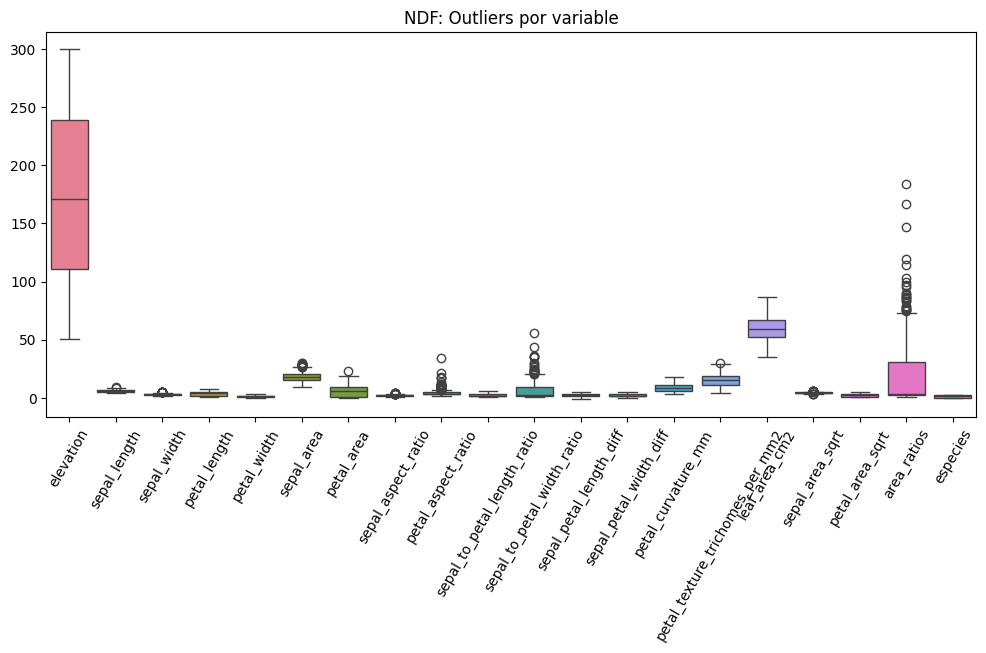

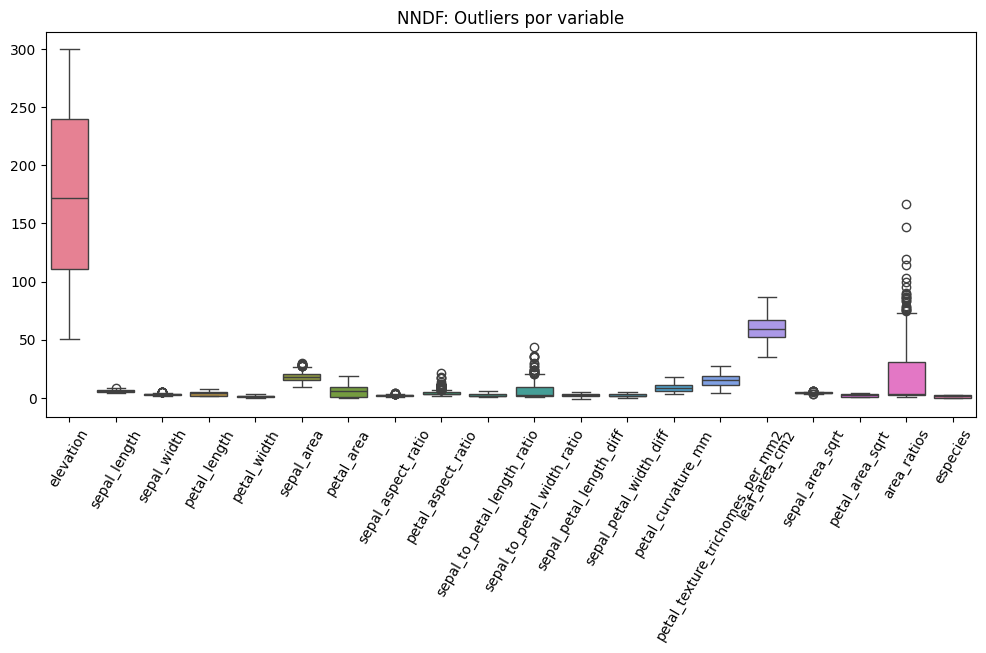

In [15]:
"""
import seaborn as sns
import matplotlib.pyplot as plt
"""
plt.figure(figsize=(12,5))
sns.boxplot(data=ndf.select_dtypes(include='number'))
plt.xticks(rotation=60)
plt.title("NDF: Outliers por variable")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=nndf.select_dtypes(include='number'))
plt.xticks(rotation=60)
plt.title("NNDF: Outliers por variable")
plt.show()


🔴 No eliminé Elevation para ver si z-score lo detectaba como outlier, pero dado que z-score respeta el rango de Elevation, y los outliers de los ratios parecen ser solo unos pocos registros, voy a eliminar todos los outliers de CDF

In [16]:
#from scipy.stats import zscore

from scipy.stats import zscore

gruposz = ndf.groupby('especies').transform(zscore)

outliers = (abs(gruposz) > 3)

print(outliers.sum())

# Filas con al menos un True (es decir, algún outlier en alguna columna)
_outliers = outliers.any(axis=1)
# Nuevo dataframe limpio
cdf = nndf[~_outliers].copy() # Clean Data Frame

elevation                           0
sepal_length                        3
sepal_width                         0
petal_length                        2
petal_width                         3
sepal_area                          2
petal_area                          5
sepal_aspect_ratio                  9
petal_aspect_ratio                 13
sepal_to_petal_length_ratio         8
sepal_to_petal_width_ratio         15
sepal_petal_length_diff             2
sepal_petal_width_diff              3
petal_curvature_mm                  4
petal_texture_trichomes_per_mm2     6
leaf_area_cm2                       2
sepal_area_sqrt                     2
petal_area_sqrt                     5
area_ratios                        16
soil_type_clay                      0
soil_type_loamy                     0
soil_type_sandy                     0
dtype: int64


<ipython-input-16-1dbdf77baeb0>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cdf = nndf[~_outliers].copy() # Clean Data Frame


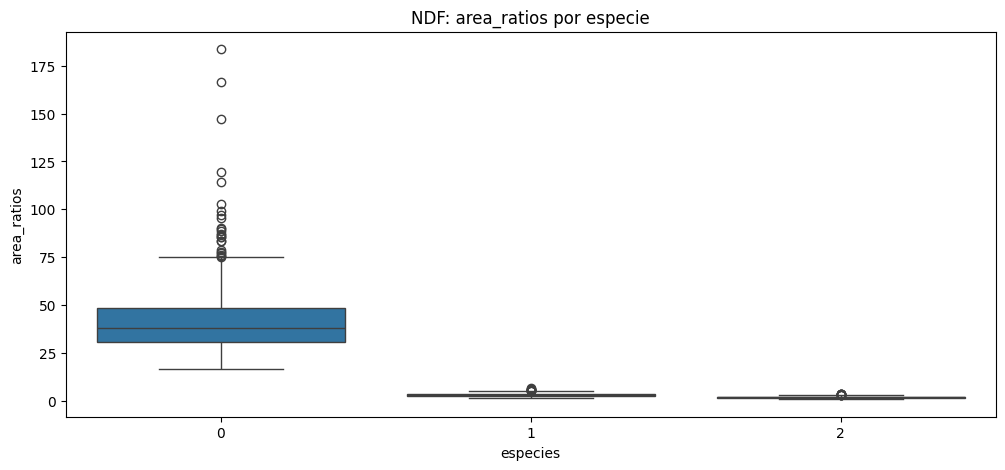

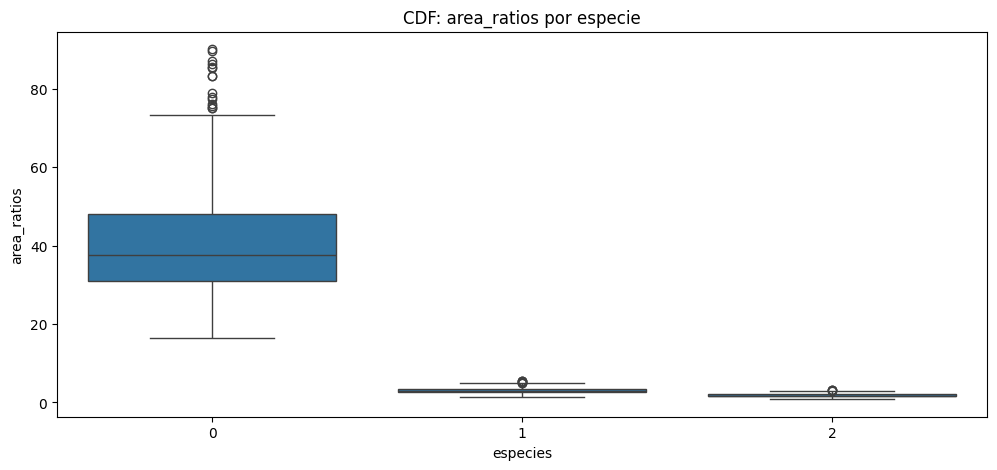

In [17]:
# Vamos a comprobar en una variable específica si se han borrado outliers o no
"""
import seaborn as sns
import matplotlib.pyplot as plt
"""
plt.figure(figsize=(12, 5))
sns.boxplot(data=ndf, x='especies', y='area_ratios')
plt.title("NDF: area_ratios por especie")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=cdf, x='especies', y='area_ratios')
plt.title("CDF: area_ratios por especie")
plt.show()

## División de datos 70% train - 30%test

In [18]:
from sklearn.model_selection import train_test_split

# Dividiré los datos después de estandarizarlos, para evitar fugas de información
# https://certidevs.com/tutorial-scikit-learn-escalado-datos
"""
# Vuelvo a separar la variable objetivo de las x en CDF
X = cdf.drop('especies', axis=1)
Y = cdf['especies']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=69, stratify=Y)
"""

"\n# Vuelvo a separar la variable objetivo de las x en CDF\nX = cdf.drop('especies', axis=1)\nY = cdf['especies']\n\nX_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=69, stratify=Y)\n"

## Estandarización de los datos

In [19]:
from sklearn.preprocessing import StandardScaler

X = cdf.drop('especies', axis=1)
Y = cdf['especies']

estandarizar = X.select_dtypes(include='float64').columns
no_estandarizar = X.select_dtypes(include='bool').columns

# Iniciamos el escalador
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[estandarizar])

scaled_df = pd.DataFrame(X_scaled, columns=estandarizar, index=X.index)
non_scaled = X[no_estandarizar]

# Juntamos las variables estandarizadas y las no estandarizadas
X_final = pd.concat([scaled_df, non_scaled], axis=1)

# Nuevo dataframe estandarizado
sdf = pd.concat([X_final, y], axis=1) # Standarized Data Frame

# Mostrar resultado
sdf.head()


,elevation,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,petal_aspect_ratio,sepal_to_petal_length_ratio,...,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios,soil_type_clay,soil_type_loamy,soil_type_sandy,especies
0,-0.176922,-0.854360,0.685078,-1.234071,-1.286473,-0.071723,-1.158674,-0.974081,1.451404,1.138024,...,-0.955766,0.710428,-0.680386,-0.025445,-1.308472,1.331165,False,False,True,0
1,1.629300,-0.471715,1.926326,-1.296615,-1.135641,1.310943,-1.128150,-1.301174,0.130024,1.564258,...,-0.776416,1.167162,-0.747118,1.288096,-1.219585,1.226381,True,False,False,0
2,-0.420818,-0.926106,-0.497986,-1.330729,-1.121929,-1.068671,-1.129789,-0.344386,-0.032196,1.454300,...,-0.851932,2.065551,-0.970869,-1.083274,-1.224057,0.532646,False,False,True,0
3,-0.834744,-1.476158,0.743262,-1.296615,-1.409882,-0.563041,-1.195011,-1.309855,3.088903,1.026744,...,-1.213780,1.697147,-0.911987,-0.532997,-1.436336,2.353456,True,False,False,0
4,-0.886311,-1.225047,-0.362225,-1.467188,-1.286473,-1.177068,-1.181966,-0.613099,0.492297,1.918075,...,-1.364812,1.406302,-1.920828,-1.205393,-1.386700,1.446108,False,True,False,0


In [20]:
# Vuelvo a separar la variable objetivo de las x en SDF
X = sdf.drop('especies', axis=1)
Y = sdf['especies']

# Hago la division de los datos en los de entrenamiento y los de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=69, stratify=Y)

## Reducción de dimensionalidad PCA
Obtener las componentes principales que aglutinen mas del 90% de la varianza de la señal original

Varianza explicada por componente: [0.59955102 0.16320417]


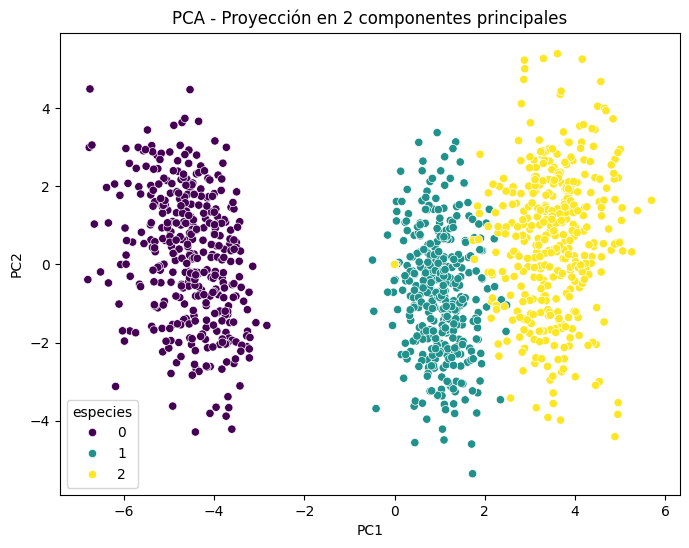

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Pipeline con imputación, escalado y PCA a 2 componentes
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    #('scaler', StandardScaler()), # Ya escalado anteriormente
    ('pca', PCA(n_components=2))
])

# 3. Ajustar y transformar X con el pipeline
X_pca = pipeline.fit_transform(X)

# 4. Crear DataFrame con PCs y la variable objetivo
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=X.index)
pca_df['especies'] = Y

# 5. Mostrar varianza explicada
pca = pipeline.named_steps['pca']
print("Varianza explicada por componente:", pca.explained_variance_ratio_)

# 6. Visualizar
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='especies', palette='viridis')
plt.title('PCA - Proyección en 2 componentes principales')
plt.show()


🔴 Podemos ver muy claramente 3 clústeres que de hecho corresponden a las 3 especies del dataFrame, y podemos conluir que las 3 especies son significativamente distintas en lo concerniente a las variables utilizadaas, lo suficiente como para intentar probar futuros modelos.

# Regresión logística

1. Creación y entrenamiento del modelo de regresión logística.
2. Evaluación del modelo (Precisión)
3. Matriz de confusión.
4. Representación curva ROC con AUC.

In [22]:
# 1.Regresion logistica
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

imputer = IterativeImputer(estimator=BayesianRidge(), random_state=69)

# Regresion logistica
pipeline = Pipeline([
    ('imputer', imputer),   # Por alguna razón, surgen nulos. Sustituyo con valores de regresion lineal, pues ya hemos visto que la mayoría de las variables cumplen normalidad
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir en el conjunto de pruebas
y_pred = pipeline.predict(X_test)

# 2.Evaluar el modelo
print("Exactitud (accuracy):", accuracy_score(y_test, y_pred)) # Precisión general
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# 3. Matriz de confusión
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))


Exactitud (accuracy): 0.9611111111111111

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       120
           1       0.90      1.00      0.94       120
           2       1.00      0.94      0.97       120

    accuracy                           0.96       360
   macro avg       0.97      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360


Matriz de confusión:
 [[113   7   0]
 [  0 120   0]
 [  0   7 113]]


🔴El modelo acretó en el 96,11% de las predicciones

Podemos ver en el reporte que el modelo es excelente haciendo predicciones en la segunda especie (especie numero 1), pero en la matriz de confusión descubrimos que el modelo confunde las especies numero 0 y 2 como numero 1, lo que indica que nuestro modelo no puede estar 100% seguro de haber predicho ninguna de las especies.

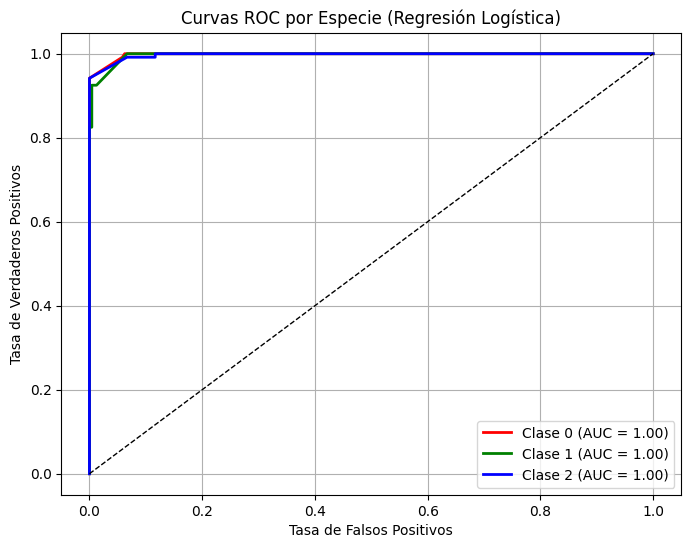

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 3. Imputador más fiable que la media
imputer = IterativeImputer(estimator=BayesianRidge(), random_state=69)

# 4. Pipeline: imputar, escalar, entrenar modelo
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# 5. Entrenar modelo
pipeline.fit(X_train, y_train)

# 6. Predecir probabilidades
y_score = pipeline.predict_proba(X_test)

# 7. Binarizar y_test para ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# 8. Calcular ROC y AUC por clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 9. Gráfica
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC por Especie (Regresión Logística)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


🔴Según la AUC (area under the curve), las predicciones son excelentes (100%), algo que choca con el 96,11% calculado anteriormente, pero puesto que la ROC valora también los falsos positivos, se entiende que es un modelo más "optimista" respecto a las predicciones.

# Arbol de decisión

1. Crear y entrenar el árbol de decisión.
2. Evaluación del modelo (Precisión).
3. Matriz de confusión.
4. Representación curva ROC con AUC.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

tree_model = DecisionTreeClassifier(random_state=69)

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Predicciones
y_pred = tree_model.predict(X_test)
y_score = tree_model.predict_proba(X_test)
# Evaluacion del modelo
print("Exactitud (accuracy):", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))

Exactitud (accuracy): 0.9305555555555556

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       120
           1       0.96      0.89      0.92       120
           2       0.85      0.96      0.90       120

    accuracy                           0.93       360
   macro avg       0.94      0.93      0.93       360
weighted avg       0.94      0.93      0.93       360


Matriz de confusión:
 [[113   0   7]
 [  0 107  13]
 [  0   5 115]]


🔴Es algo menos preciso que la regresión logística. He leído en los apuntes que ignoan los NaN que han ido surgiendo, "robustez al ruido y valores faltantes", y es cierto, he probado a quitar los valores faltantes y de hecho saca una exactitud 0,55% menor.

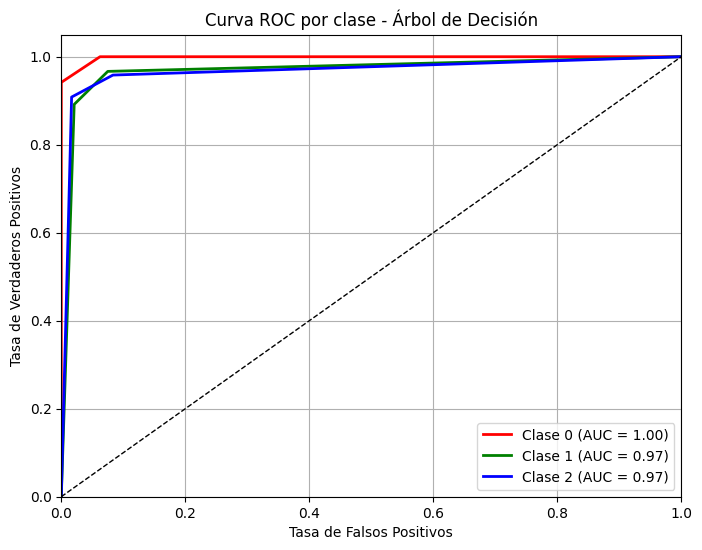

In [25]:
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# 5. Calcular FPR, TPR y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 6. Graficar curvas ROC
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Clase {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por clase - Árbol de Decisión')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

🔴 En este caso la AUC no es 1.00, lo que me sorprende, y además, según las categorías que he leído en elsevier.es, ya está en el límite para dejar de considerarse excelente (mejor puntuación) y pasar a ser muy buena (5 de 6 estrellas).

Fuente:
https://www.elsevier.es/es-revista-medicina-familia-semergen-40-articulo-la-curva-roc-S1138359322001952#:~:text=La%20curva%20ROC%20es%20una,para%20distintos%20puntos%20de%20corte.

# Bosques aleatorios

1. Crear y entrenar el árbol de decisión.
2. Evaluación del modelo (Precisión).
3. Matriz de confusión.
4. Representación curva ROC con AUC.

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier

imputer = IterativeImputer(estimator=BayesianRidge(), random_state=453)

# Crear modelo
pipeline_rf = Pipeline([
    ('imputer', imputer),
    ('rf', RandomForestClassifier(random_state=547))
])

# Entrenar el modelo
pipeline_rf.fit(X_train, y_train)
y_score = pipeline_rf.predict_proba(X_test)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Predecir
y_pred = pipeline_rf.predict(X_test)
# Evaluar el modelo
print("Exactitud (accuracy):", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))


Exactitud (accuracy): 0.95

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       120
           1       0.99      0.92      0.95       120
           2       0.88      0.99      0.93       120

    accuracy                           0.95       360
   macro avg       0.96      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360


Matriz de confusión:
 [[113   0   7]
 [  0 110  10]
 [  0   1 119]]


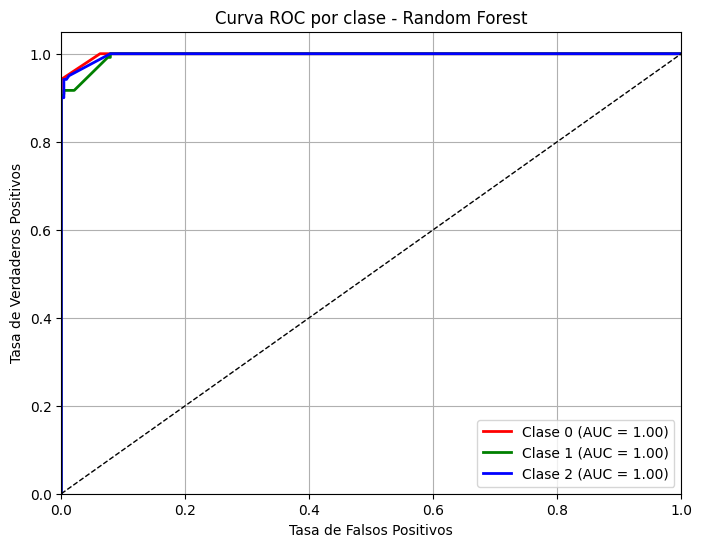

In [28]:
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# 5. Calcular FPR, TPR y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 6. Graficar curvas ROC
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Clase {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)  # Línea diagonal (azar)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por clase - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Conclusion

Creo que Z-score no ha sido la mejor estrategia para limpiar los outliers, además que la prueba de Sapiro-Wilk no ha terminado siendo relevante, puesto que he terminado limpiando también los datos que dieron negativo en normalidad con el mismo z-score que supone normalidad.

La aparición de NaN(s) me ha sorprendido, en el futuro investigaré como es posible que surgan este tipo de problemas.

Al final, el modelo más útil y preciso en las predicciones ha sido la regresión logística, aunque los arboles y bosques aleatorios han sido extremadamente precisos con la especie numero 0.